<a href="https://colab.research.google.com/github/Jiaye39/TimeSeriesAnalysis/blob/main/02_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part of Speech & Parsing & NER



This notebook deals with the following activities:
* Part-of-Speech tagging (POS-tagging) 词性标注
* Dependency & Consitituency Parsing 句法分析
* Named Entity Recognition 实体命名识别


# POS Tagging

* POS Tagging associates each token to a "part of speech" type
* Parts of Speech include such categories as:
  * noun
  * verb
  * adjective
  * pronoun
  * etc...

Each category is identified by a tag from the [Universal Tagset (UPOS)](https://universaldependencies.org/u/pos/), which is multi-lingual. Specific, more detailed, language-specific tagsets also exist to accomodate a finer-grained classification of words.

With [SpaCy](https://spacy.io/):
* a string is transformed into an object `Doc` [Documentation](https://spacy.io/api/doc)
* Each token is represented by an object of class `Token` [Documentation](https://spacy.io/api/token)
* Each `Token` in the `Doc` has attributes
* Attribute `pos_` is the Part-Of-Speech tag (string), from the UPOS tagset.

It seems that NLTK only supports POS-Tagging for English and Russian

We will demonstrate here with the following languages and libraries:
* English (SpaCy)
* Simplified Chinese (SpaCy)


# English

In [8]:
import spacy

en = spacy.load("en_core_web_sm")
doc_en= en("I flew to New York to admire the painting Starry Night by Van Gogh.")

In [9]:
for i in range(len(doc)):
    print(f"Token {i:02d} {doc[i].text:<10} POS={doc[i].pos_}")

Token 00 自然         POS=ADV
Token 01 語言         POS=VERB
Token 02 處理         POS=NOUN
Token 03 （          POS=PUNCT
Token 04 英文         POS=NOUN
Token 05 ：          POS=PUNCT
Token 06 natural    POS=PROPN
Token 07 language   POS=NOUN
Token 08 processing POS=PROPN
Token 09 ，          POS=PUNCT
Token 10 NLP        POS=PROPN
Token 11 ）          POS=PUNCT
Token 12 係          POS=NOUN
Token 13 人工         POS=ADJ
Token 14 智能         POS=NOUN
Token 15 同          POS=ADP
Token 16 語言         POS=NOUN
Token 17 學嘅         POS=NOUN
Token 18 一          POS=NUM
Token 19 個          POS=NUM
Token 20 綜合         POS=NOUN
Token 21 領域         POS=NOUN
Token 22 ，          POS=PUNCT
Token 23 包含         POS=VERB
Token 24 咗          POS=VERB
Token 25 一系列        POS=NUM
Token 26 用          POS=ADP
Token 27 嚟教         POS=NOUN
Token 28 電腦         POS=VERB
Token 29 處理         POS=VERB
Token 30 同          POS=ADP
Token 31 運算         POS=NOUN
Token 32 語言         POS=VERB
Token 33 同          POS=ADP
Token 34 文字    

# Simplified Chinese




In [10]:
!python -m spacy download zh_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/zh_core_web_sm-3.8.0/zh_core_web_sm-3.8.0-py3-none-any.whl (48.5 MB)
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
zh = spacy.load("zh_core_web_sm")

# Natural language processing (NLP) is an integrated field of artificial intelligence and linguistics that encompasses a range of techniques for teaching computers to process and compute language and text. NLP workers also use these techniques to develop useful computer systems.
doc_zh= zh("自然語言處理（英文：natural language processing，NLP）係人工智能同語言學嘅一個綜合領域，包含咗一系列用嚟教電腦處理同運算語言同文字嘅技術。NLP 工作者仲用呢啲技術開發出有用嘅電腦系統。")
for i in range(len(doc)):
    print(f"Token {i:02d} {doc[i].text:<12} POS={doc[i].pos_}")

Token 00 自然           POS=ADV
Token 01 語言           POS=VERB
Token 02 處理           POS=NOUN
Token 03 （            POS=PUNCT
Token 04 英文           POS=NOUN
Token 05 ：            POS=PUNCT
Token 06 natural      POS=PROPN
Token 07 language     POS=NOUN
Token 08 processing   POS=PROPN
Token 09 ，            POS=PUNCT
Token 10 NLP          POS=PROPN
Token 11 ）            POS=PUNCT
Token 12 係            POS=NOUN
Token 13 人工           POS=ADJ
Token 14 智能           POS=NOUN
Token 15 同            POS=ADP
Token 16 語言           POS=NOUN
Token 17 學嘅           POS=NOUN
Token 18 一            POS=NUM
Token 19 個            POS=NUM
Token 20 綜合           POS=NOUN
Token 21 領域           POS=NOUN
Token 22 ，            POS=PUNCT
Token 23 包含           POS=VERB
Token 24 咗            POS=VERB
Token 25 一系列          POS=NUM
Token 26 用            POS=ADP
Token 27 嚟教           POS=NOUN
Token 28 電腦           POS=VERB
Token 29 處理           POS=VERB
Token 30 同            POS=ADP
Token 31 運算           POS=NOUN
Token 32

# Dependency Parsing
关注词语之间的句法关系，即一个词语依赖于另一个词语。它认为句子是由词语以及它们之间的二元不对称关系（即“依存关系”）构成的。例如，它会识别动词和其主语、宾语之间的直接关系，形容词和它修饰的名词之间的关系等。

**区分两种Parsing:**
如果你想知道哪个词修饰了哪个词，或者哪个词是哪个动作的主体，那么Dependency Parsing更直接。它揭示了词语之间的语义和语法功能。
如果你想知道句子是如何被组织成不同的语法块（短语），那么Constituency Parsing短语结构句法分析更合适。它展示了句子的层次结构和组成部分。

In [ ]:
spacy.displacy.render(doc_en,style="dep")

# Constituency Parsing

关注句子的组成结构，即词语如何组合成更小的短语（如名词短语、动词短语），然后这些短语又如何组合成更大的短语，直到最终构成整个句子。它强调的是句子的层级构成和成分划分。

树的内部节点是短语类型（如NP - 名词短语，VP - 动词短语），叶节点是句子中的词语。

In [13]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 30.6 MB/s eta 0:00:00


In [14]:
import stanza
en_pipe=stanza.Pipeline(lang='en',processor='tokenize,pos,constituency')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [17]:
en_doc=en_pipe(doc_en.text)

stanza_tree=en_doc.sentences[0].constituency
str(stanza_tree)

'(ROOT (S (NP (PRP I)) (VP (VBD flew) (PP (IN to) (NP (NNP New) (NNP York))) (S (VP (TO to) (VP (VB admire) (NP (NP (DT the) (NN painting)) (NP (NNP Starry) (NNP Night))) (PP (IN by) (NP (NNP Van) (NNP Gogh))))))) (. .)))'

NLTK has also a type `Tree` and it has developed a visualization for these objects, so we can run this process:

* Convert from "Stanza" Tree to "NLTK" Tree easily, by using the string representation of the tree
* Install `svgling`
* Use `IPython.display` to draw an image of the tree

In [18]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.0 MB/s eta 0:00:00


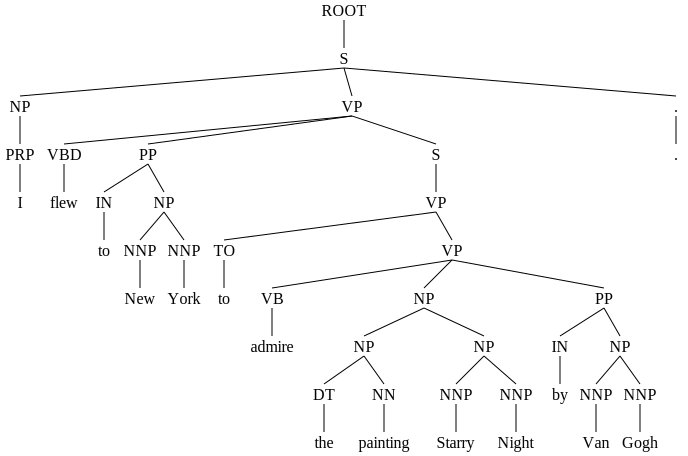

In [19]:
from IPython.display import display
from nltk.tree import Tree

nltk_tree = Tree.fromstring(str(stanza_tree))
display(nltk_tree)

ROOT: 它是整棵句法树的根节点，代表整个句子。

S (Sentence): 句子。这是一个句法单元，通常包含一个主语和一个谓语。

NP (Noun Phrase): 名词短语。这是一个由名词（或代词）作为核心的短语，可以包含限定词、形容词、介词短语等修饰成分。例如：“the painting”或 “New York”。

VP (Verb Phrase): 动词短语。这是一个由动词作为核心的短语，可以包含宾语、状语、补语等。例如：“flew to New York” 或 “admire the painting”。

PP (Prepositional Phrase): 介词短语。这是一个由介词作为核心的短语，后面通常跟着一个名词短语。例如：“to New York” 或 “by Van Gogh”。

ADJP (Adjective Phrase): 形容词短语。以形容词为核心的短语。

ADVP (Adverb Phrase): 副词短语。以副词为核心的短语。

DT (Determiner): 限定词。例如 the, a, an。

IN (Preposition or Subordinating Conjunction): 介词或从属连词。例如 to, by。

PRP (Personal Pronoun): 人称代词。例如 I, he, she。

VBD (Verb, past tense): 过去式动词。例如 flew。

VBP (Verb, non-3rd person singular present): 动词，非第三人称单数现在时。

VB (Verb, base form): 动词原形。例如 admire。

TO (to): 动词不定式标记 to。

NN (Noun, singular or mass): 名词，单数或不可数。例如 painting。

NNS (Noun, plural): 名词，复数。

NNP (Proper Noun, singular): 专有名词，单数。例如 New York, Starry Night, Van Gogh。

NNPS (Proper Noun, plural): 专有名词，复数。

. (Punctuation mark, sentence closer): 句号等标点符号

# NER

* Named Entity Recognition
* Identifies that a span is a mention of an entity of some category
* With SpaCy, a span is an object of type `Span` [Documentation](https://spacy.io/api/span)
* In a `Doc`, the attribute `ents` gives away the spans
* Each object `Span` has an attribute `ent_` to get the entity category
* `ent_` :命名实体，例如人名、地名、组织机构名等。

In [21]:
spacy.displacy.render(doc_en, jupyter=True, style="ent")

.ents 是 Doc 对象的一个属性，它会返回一个由 Span 对象组成的元组（tuple），每个 Span 对象代表一个被识别出来的命名实体，例如人名、地名、组织机构名等。

In [23]:
doc_en.ents

(New York, Starry Night, Van Gogh)

In [25]:
from spacy.tokens import Span

for ent in doc_en.ents:
    print(f'{ent.text:<20}: start at token #{ent.start:02d}, end at token #{ent.end:02d}, Entity={ent.label_}')

New York            : start at token #03, end at token #05, Entity=GPE
Starry Night        : start at token #09, end at token #11, Entity=PERSON
Van Gogh            : start at token #12, end at token #14, Entity=PERSON
